In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier, plot_importance
import shap



c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
alias_nombres = {
    "Sinner J.": "Jannik Sinner",
    "Zverev A.": "Alexander Zverev",
    "Alcaraz C.": "Carlos Alcaraz",
    "Fritz T.": "Taylor Fritz",
    "Draper J.": "Jack Draper",
    "Djokovic N.": "Novak Djokovic",
    "Ruud C.": "Casper Ruud",
    "De Minaur A.": "Alex De Minaur",
    "Musetti L.": "Lorenzo Musetti",
    "Rune H.": "Holger Rune",
    "Medvedev D.": "Daniil Medvedev",
    "Paul T.": "Tommy Paul",
    "Shelton B.": "Ben Shelton",
    "Fils A.": "Arthur Fils",
    "Dimitrov G.": "Grigor Dimitrov",
    "Tiafoe F.": "Frances Tiafoe",
    "Rublev A.": "Andrey Rublev",
    "Cerundolo F.": "Francisco Cerundolo",
    "Tsitsipas S.": "Stefanos Tsitsipas",
    "Machac T.": "Tomas Machac",
    "Mensik J.": "Jakub Mensik",
    "Humbert U.": "Ugo Humbert",
    "Korda S.": "Sebastian Korda",
    "Khachanov K.": "Karen Khachanov",
    "Popyrin A.": "Alexei Popyrin",
    "Davidovich Fokina A.": "Alejandro Davidovich Fokina",
    "Auger-Aliassime F.": "Felix Auger Aliassime",
    "Shapovalov D.": "Denis Shapovalov",
    "Nakashima B.": "Brandon Nakashima",
    "Berrettini M.": "Matteo Berrettini",
    "Hurkacz H.": "Hubert Hurkacz",
    "Michelsen A.": "Alex Michelsen",
    "Baez S.": "Sebastian Baez",
    "Cobolli F.": "Flavio Cobolli",
    "Griekspoor T.": "Tallon Griekspoor",
    "Mpetshi Perricard G.": "Giovanni Mpetshi Perricard",
    "Arnaldi M.": "Matteo Arnaldi",
    "Lehecka J.": "Jiri Lehecka",
    "Muller A.": "Alexandre Muller",
    "Borges N.": "Nuno Borges",
    "Thompson J.": "Jordan Thompson",
    "Tabilo A.": "Alejandro Tabilo",
    "Monfils G.": "Gael Monfils",
    "Sonego L.": "Lorenzo Sonego",
    "Giron M.": "Marcos Giron",
    "Darderi L.": "Luciano Darderi",
    "Kecmanovic M.": "Miomir Kecmanovic",
    "Goffin D.": "David Goffin",
    "Martinez P.": "Pedro Martinez",
    "Bergs Z.": "Zizou Bergs",
    "Etcheverry T.": "Tomas Martin Etcheverry",
    "Halys Q.": "Quentin Halys",
    "Jarry N.": "Nicolas Jarry",
    "Diallo G.": "Gabriel Diallo",
    "Zhang Z.": "Zhizhen Zhang",
    "Bautista Agut R.": "Roberto Bautista Agut",
    "Fearnley J.": "Jacob Fearnley",
    "Bonzi B.": "Benjamin Bonzi",
    "Carballes Baena R.": "Roberto Carballes Baena",
    "Ugo Carabelli C.": "Camilo Ugo Carabelli",
    "Marozsan F.": "Fabian Marozsan",
    "Nishikori K.": "Kei Nishikori",
    "Comesana F.": "Francisco Comesana",
    "Djere L.": "Laslo Djere",
    "Fonseca J.": "Joao Fonseca",
    "Munar J.": "Jaume Munar",
    "Shang J.": "Juncheng Shang",
    "Bellucci M.": "Mattia Bellucci",
    "Dzumhur D.": "Damir Dzumhur",
    "Tien L.": "Learner Tien",
    "Altmaier D.": "Daniel Altmaier",
    "Medjedovic H.": "Hamad Medjedovic",
    "Yunchaokete B.": "Bu Yunchaokete",
    "Nishioka Y.": "Yoshihito Nishioka",
    "Rinderknech A.": "Arthur Rinderknech",
    "Bublik A.": "Alexander Bublik",
    "Safiullin R.": "Roman Safiullin",
    "Gaston H.": "Hugo Gaston",
    "Vukic A.": "Aleksandar Vukic",
    "Kovacevic A.": "Aleksandar Kovacevic",
    "Oconnell C.": "Christopher Oconnell",
    "Hijikata R.": "Rinky Hijikata",
    "Moutet C.": "Corentin Moutet",
    "Coric B.": "Borna Coric",
    "Van De Zandschulp B.": "Botic Van De Zandschulp",
    "Collignon R.": "Raphael Collignon",
    "Struff J.L.": "Jan Lennard Struff",
    "Walton A.": "Adam Walton",
    "Majchrzak K.": "Kamil Majchrzak",
    "Duckworth J.": "James Duckworth",
    "Norrie C.": "Cameron Norrie",
    "Kopriva V.": "Vit Kopriva",
    "De Jong J.": "Jesper De Jong",
    "Opelka R.": "Reilly Opelka",
    "Nardi L.": "Luca Nardi",
    "Mcdonald M.": "Mackenzie Mcdonald",
    "Shevchenko A.": "Alexander Shevchenko",
    "Carreno Busta P.": "Pablo Carreno Busta",
    "Navone M.": "Mariano Navone",
    "Basavareddy N.": "Nishesh Basavareddy"
}

In [5]:

# === Paso 1: Cargar datasets ===
df_partidos = pd.read_csv("dataset_3hard.csv", delimiter=';')
df_stats = pd.read_csv("Estadisticas_2024_limpio/stats_Hard.csv")

# Limpiar nombres
df_stats['Player'] = df_stats['Player'].str.strip()
df_partidos['Local'] = df_partidos['Local'].str.strip()
df_partidos['Visitante'] = df_partidos['Visitante'].str.strip()


# Reemplazar nombres en el dataset de partidos
df_partidos['Local'] = df_partidos['Local'].replace(alias_nombres)
df_partidos['Visitante'] = df_partidos['Visitante'].replace(alias_nombres)

# === Paso 3: Merge jugador local ===
df_local = df_partidos.merge(df_stats, how='left', left_on='Local', right_on='Player', suffixes=('', '_local'))
df_local = df_local.drop(columns=['Player'])

local_stat_cols = [col for col in df_local.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L']]
df_local = df_local.rename(columns={col: f'1_{col}' for col in local_stat_cols})

# === Paso 4: Merge jugador visitante ===
df_final = df_local.merge(df_stats, how='left', left_on='Visitante', right_on='Player', suffixes=('', '_visit'))
df_final = df_final.drop(columns=['Player'])

visit_stat_cols = [col for col in df_final.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L'] and not col.startswith('1_')]
df_final = df_final.rename(columns={col: f'2_{col}' for col in visit_stat_cols})

In [29]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo1_entrenamiento.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [14]:

# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo1_entrenamiento.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model1.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Evaluación en Test ===
Accuracy: 0.6852
F1 Score: 0.7463
Confusion Matrix:
 [[12  7]
 [10 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.63      0.59        19
           1       0.78      0.71      0.75        35

    accuracy                           0.69        54
   macro avg       0.66      0.67      0.67        54
weighted avg       0.70      0.69      0.69        54



In [6]:
# Importancia de variables
rf_importances = pd.Series(model1.feature_importances_, index=X.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Muestra todas las filas
print("\n=== Importancia de Variables ===")
print(rf_importances)


=== Importancia de Variables ===
2_BPChnc     0.030623
2_vAce%      0.027542
2_Bkn/S      0.023895
2_G W%       0.023381
2_RPW        0.021610
1_G W%       0.020969
1_BPConv%    0.020936
2_S W%       0.020302
1_v1st%      0.020045
1_BPvs/G     0.019741
1_M          0.019688
2_Bks/M      0.019215
1_S W%       0.019199
1_2%-InP     0.019162
1_TB W%      0.018994
1_TPW%       0.018866
1_DF/2s      0.017901
2_M          0.017853
2_v2nd%      0.017743
1_vAce%      0.016991
1_BPvs/M     0.016771
1_2nd%       0.016572
2_DF/2s      0.016567
2_DF%        0.016369
2_2nd%       0.015622
2_BPSvd%     0.015560
1_RPW        0.015475
1_v2nd%      0.014927
2_M W%       0.014822
1_Ace%       0.014707
1_BPSvd%     0.014652
2_Bks/S      0.014537
2_TB W%      0.014088
1_1stIn      0.013858
2_TPW%       0.013780
1_vDF%       0.013755
1_BP/M       0.012994
1_DF%        0.012876
1_Bks/M      0.012666
2_Hld%       0.012552
1_SPW        0.012517
2_BPConv%    0.012483
1_1st%       0.012483
2_SPW        0.01216

Si le incluyo la caracteristica de DR ganaria precision, deberia?

CUANTAS VARIABLES DE LAS MENOS IMPORTANTES QUITO?

In [7]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk', 'BPvs/M', 'BPvs/G', 'Bkn/M','BP/S', 'BP/G']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo2_entrenamiento.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [8]:
# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo2_entrenamiento.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model2.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Evaluación en Test ===
Accuracy: 0.6852
F1 Score: 0.7536
Confusion Matrix:
 [[11  8]
 [ 9 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.58      0.56        19
           1       0.76      0.74      0.75        35

    accuracy                           0.69        54
   macro avg       0.66      0.66      0.66        54
weighted avg       0.69      0.69      0.69        54



Igual respecto al anterior (1 falso negativo mas y 1 falso positivo menos)

RESULTADOS QUITANDO LAS VARIABLES MENOS IMPORTANTES SEGUN RF

In [9]:
# Importancia de variables
rf_importances = pd.Series(model2.feature_importances_, index=X.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Muestra todas las filas
print("\n=== Importancia de Variables ===")
print(rf_importances)


=== Importancia de Variables ===
2_BPChnc     0.033468
1_vDF%       0.028134
1_S W%       0.025698
2_S W%       0.025633
1_2%-InP     0.025411
2_Bks/M      0.024492
1_TPW%       0.024452
2_G W%       0.024188
2_vAce%      0.023609
1_BPConv%    0.023221
1_TB W%      0.022663
2_Bkn/S      0.021595
2_RPW        0.020987
2_BPSvd%     0.020556
1_vAce%      0.020540
1_G W%       0.019671
2_TPW%       0.019648
2_Hld%       0.019229
1_v1st%      0.019119
2_2nd%       0.018649
1_M W%       0.018604
2_DF/2s      0.017911
2_M          0.017735
2_M W%       0.017170
1_Brk%       0.016972
1_1stIn      0.016705
2_Bks/S      0.016373
1_M          0.016168
1_RPW        0.016098
1_BPSvd%     0.015795
2_1st%       0.015778
1_v2nd%      0.015079
1_BPChnc     0.014722
2_SPW        0.014719
1_1st%       0.014615
1_DF/2s      0.014393
1_BP/M       0.014282
2_Ace%       0.014227
1_Bks/M      0.014205
2_2%-InP     0.014115
1_Ace%       0.014076
1_BPvs/S     0.013974
1_SPW        0.013733
2_v2nd%      0.01367

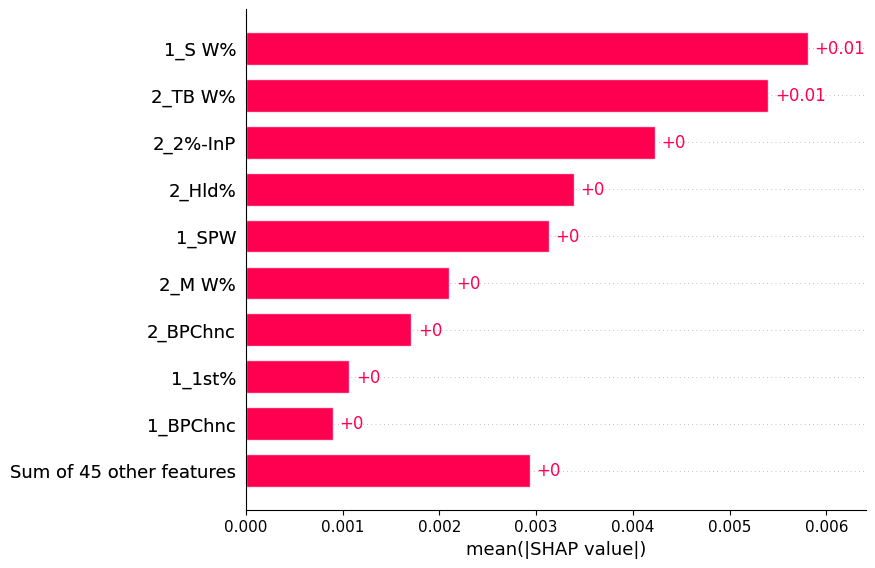

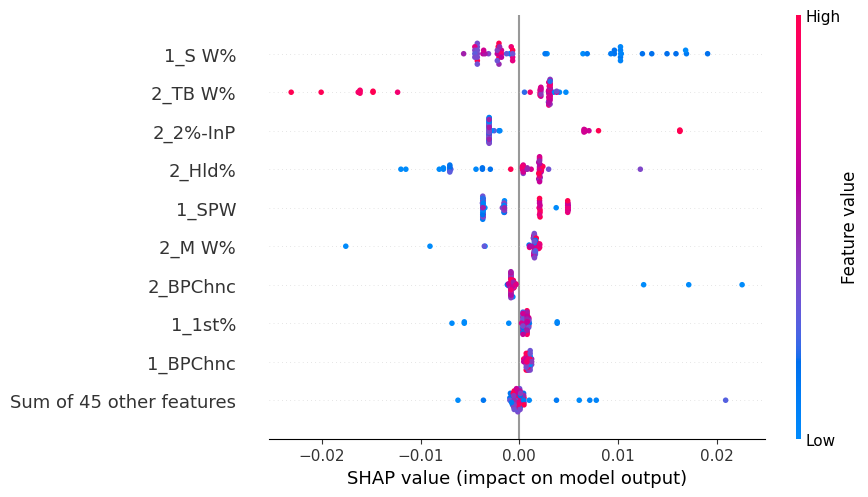

In [24]:

# Crear el explainer con el modelo y los datos de entrenamiento
explainer = shap.Explainer(model2, X_train)

# Calcular los valores SHAP con chequeo desactivado
shap_values = explainer(X_test, check_additivity=False)

# Extraer los valores SHAP de la clase 1 (victoria)
if len(shap_values.values.shape) == 3:
    shap_values_class1 = shap.Explanation(
        values=shap_values.values[:, :, 1],
        base_values=shap_values.base_values[:, 1],
        data=shap_values.data,
        feature_names=shap_values.feature_names
    )
else:
    shap_values_class1 = shap_values

# Visualización de importancia global
shap.plots.bar(shap_values_class1)
shap.plots.beeswarm(shap_values_class1)

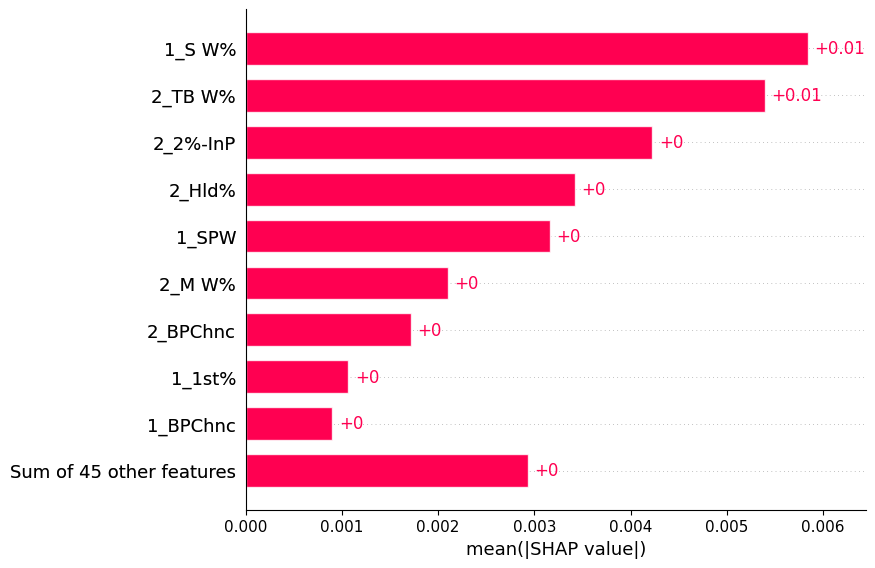

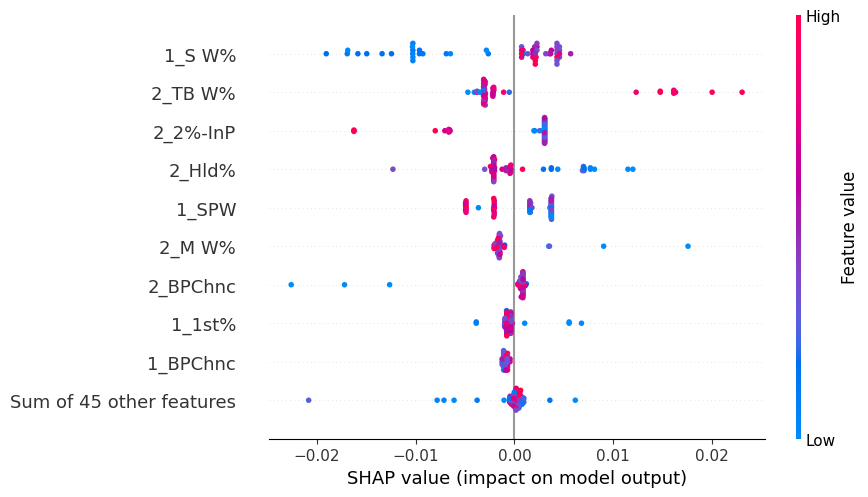

In [ ]:

# Crear el explainer con el modelo y los datos de entrenamiento
explainer = shap.Explainer(model2, X_train)

# Calcular los valores SHAP con chequeo desactivado
shap_values = explainer(X_test, check_additivity=False)

# Extraer los valores SHAP de la clase 0
if len(shap_values.values.shape) == 3:
    shap_values_class1 = shap.Explanation(
        values=shap_values.values[:, :, 0],
        base_values=shap_values.base_values[:, 0],
        data=shap_values.data,
        feature_names=shap_values.feature_names
    )
else:
    shap_values_class1 = shap_values

# Visualización de importancia global
shap.plots.bar(shap_values_class1)
shap.plots.beeswarm(shap_values_class1)

In [10]:
# === Paso 1: Cargar datasets ===
df_partidos = pd.read_csv("dataset_3hard.csv", delimiter=';')
df_stats = pd.read_csv("Estadisticas_2024_limpio/estadisticas_generales_2024.csv")

# Limpiar nombres
df_stats['Player'] = df_stats['Player'].str.strip()
df_partidos['Local'] = df_partidos['Local'].str.strip()
df_partidos['Visitante'] = df_partidos['Visitante'].str.strip()


# Reemplazar nombres en el dataset de partidos
df_partidos['Local'] = df_partidos['Local'].replace(alias_nombres)
df_partidos['Visitante'] = df_partidos['Visitante'].replace(alias_nombres)

# === Paso 3: Merge jugador local ===
df_local = df_partidos.merge(df_stats, how='left', left_on='Local', right_on='Player', suffixes=('', '_local'))
df_local = df_local.drop(columns=['Player'])

local_stat_cols = [col for col in df_local.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L']]
df_local = df_local.rename(columns={col: f'1_{col}' for col in local_stat_cols})

# === Paso 4: Merge jugador visitante ===
df_final = df_local.merge(df_stats, how='left', left_on='Visitante', right_on='Player', suffixes=('', '_visit'))
df_final = df_final.drop(columns=['Player'])

visit_stat_cols = [col for col in df_final.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L'] and not col.startswith('1_')]
df_final = df_final.rename(columns={col: f'2_{col}' for col in visit_stat_cols})

In [12]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk', 'BPvs/M', 'BPvs/G', 'Bkn/M','BP/S', 'BP/G']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo3_entrenamiento.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [13]:
# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo3_entrenamiento.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model1.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Evaluación en Test ===
Accuracy: 0.5556
F1 Score: 0.6364
Confusion Matrix:
 [[ 9 10]
 [14 21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.47      0.43        19
           1       0.68      0.60      0.64        35

    accuracy                           0.56        54
   macro avg       0.53      0.54      0.53        54
weighted avg       0.58      0.56      0.56        54



RESULTADOS DE RF CON ESTADISTICAS GENERALES
EMPEORA -->TIENE SENTIDO

In [17]:
# === Cargar dataset ===
df = pd.read_csv("dataset_modelo1_entrenamiento.csv")

# === Eliminar columnas no predictivas (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar en entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Entrenar modelo XGBoost ===
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# === Evaluación ===
y_pred = model.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === Importancia de variables POR TERMINAL SIN PLT ===
xgb_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Muestra todas las filas
print("\n=== Importancia de Variables ===")
print(xgb_importances)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:06:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Evaluación en Test ===
Accuracy: 0.6852
F1 Score: 0.7463
Confusion Matrix:
 [[12  7]
 [10 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.63      0.59        19
           1       0.78      0.71      0.75        35

    accuracy                           0.69        54
   macro avg       0.66      0.67      0.67        54
weighted avg       0.70      0.69      0.69        54


=== Importancia de Variables ===
2_BPChnc     0.066265
1_RPW        0.053950
2_G W%       0.045641
1_BPvs/G     0.044966
2_Bkn/S      0.027210
2_2%-InP     0.021937
1_BPvs/S     0.021027
1_2%-InP     0.020147
1_S W%       0.019595
2_TPW%       0.018979
1_vDF%       0.018670
1_TB W%      0.018245
1_Bkn/M      0.017593
1_2nd%       0.017572
1_v1st%      0.016502
2_v1st%      0.016433
1_TPW%       0.016344
2_RPW        0.016142
1_BPvs/M     0.016063
2_TB W%      0.015918
1_Hld%       0.015443
2_S W%       0.015375
2_DF%        0.015264
2_BPSvd% 

XGB NO ES MEJOR QUE RF

In [ ]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk', 'BPvs/G', 'Bkn/M','BP/S', 'BP/G', 'Bkn/S',]]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo4_entrenamiento.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [ ]:
# === Cargar dataset === quitando las menos impoarntes para xgboost
df = pd.read_csv("dataset_modelo4_entrenamiento.csv")

# === Eliminar columnas no predictivas (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar en entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Entrenar modelo XGBoost ===
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

# === Evaluación ===
y_pred = model.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === Importancia de variables ===
xgb_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
pd.set_option('display.max_rows', None)  # Muestra todas las filas
print("\n=== Importancia de Variables ===")
print(xgb_importances)

=== Evaluación en Test ===
Accuracy: 0.5741
F1 Score: 0.6349
Confusion Matrix:
 [[11  8]
 [15 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.58      0.49        19
           1       0.71      0.57      0.63        35

    accuracy                           0.57        54
   macro avg       0.57      0.58      0.56        54
weighted avg       0.61      0.57      0.58        54


=== Importancia de Variables ===
2_S W%       0.074698
1_2%-InP     0.049301
2_BPChnc     0.043428
2_RPW        0.041212
1_M W%       0.034039
1_v2nd%      0.029371
1_vDF%       0.027459
2_vAce%      0.027344
1_Brk%       0.027096
2_BPSvd%     0.025824
1_Ace%       0.024781
2_M W%       0.024607
1_2nd%       0.024397
1_RPW        0.022946
2_Bks/S      0.022193
2_Ace%       0.021653
2_v2nd%      0.020277
2_BPConv%    0.019922
1_G W%       0.019562
1_vAce%      0.019118
1_Hld%       0.018373
2_v1st%      0.017818
2_DF/2s      0.017679
1_DF%    

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:13:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SI QUITO VARIABLES EL MODELO  XGBOOST EMPEORA

In [7]:

# === Paso 1: Cargar datasets ===
df_partidos = pd.read_csv("dataset_3hard.csv", delimiter=';')
df_stats = pd.read_csv("stats_Hard2_limpio_escalado.csv")

# Limpiar nombres
df_stats['Player'] = df_stats['Player'].str.replace(r"\[.*?\]", "", regex=True).str.strip()
df_stats['Player'] = df_stats['Player'].str.strip()
df_partidos['Local'] = df_partidos['Local'].str.strip()
df_partidos['Visitante'] = df_partidos['Visitante'].str.strip()


# Reemplazar nombres en el dataset de partidos
df_partidos['Local'] = df_partidos['Local'].replace(alias_nombres)
df_partidos['Visitante'] = df_partidos['Visitante'].replace(alias_nombres)

# === Paso 3: Merge jugador local ===
df_local = df_partidos.merge(df_stats, how='left', left_on='Local', right_on='Player', suffixes=('', '_local'))
df_local = df_local.drop(columns=['Player'])

local_stat_cols = [col for col in df_local.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L']]
df_local = df_local.rename(columns={col: f'1_{col}' for col in local_stat_cols})

# === Paso 4: Merge jugador visitante ===
df_final = df_local.merge(df_stats, how='left', left_on='Visitante', right_on='Player', suffixes=('', '_visit'))
df_final = df_final.drop(columns=['Player'])

visit_stat_cols = [col for col in df_final.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L'] and not col.startswith('1_')]
df_final = df_final.rename(columns={col: f'2_{col}' for col in visit_stat_cols})

In [8]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player', 'Rk']]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("dataset_modelo_norm_entrenamiento.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [9]:

# === Cargar el dataset ===
df = pd.read_csv("dataset_modelo_norm_entrenamiento.csv")

# === Eliminar columnas que no queremos usar (nombres de jugadores) ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']


# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Crear y entrenar el modelo ===
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# === Predicciones y evaluación ===
y_pred = model1.predict(X_test)

print("=== Evaluación en Test ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Evaluación en Test ===
Accuracy: 0.6852
F1 Score: 0.7536
Confusion Matrix:
 [[11  8]
 [ 9 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.58      0.56        19
           1       0.76      0.74      0.75        35

    accuracy                           0.69        54
   macro avg       0.66      0.66      0.66        54
weighted avg       0.69      0.69      0.69        54



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# === Cargar el dataset final ===
df = pd.read_csv("dataset_modelo_norm_entrenamiento.csv")

# === Guardar información original para análisis posterior ===
X_full = df.drop(columns=['W_OR_L'])
X_full_extra = X_full[['Local', 'Visitante', 'Surface']]

# === Preparar datos para entrenamiento ===
X = df.drop(columns=['W_OR_L', 'Local', 'Visitante', 'Surface'])
y = df['W_OR_L']

# === Separar entrenamiento y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_test_indices = X_test.index

# === Entrenar el modelo ===
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

# === Hacer predicciones ===
y_pred = model1.predict(X_test)
y_proba = model1.predict_proba(X_test)[:, 1]  # Probabilidad clase 1

# === Crear DataFrame con resultados ===
df_resultados = X_test.copy()
df_resultados['Local'] = X_full_extra.loc[X_test_indices, 'Local'].values
df_resultados['Visitante'] = X_full_extra.loc[X_test_indices, 'Visitante'].values
df_resultados['Surface'] = X_full_extra.loc[X_test_indices, 'Surface'].values
df_resultados['Real'] = y_test.values
df_resultados['Predicho'] = y_pred
df_resultados['Probabilidad_Clase_1'] = y_proba
df_resultados['Correcto'] = df_resultados['Real'] == df_resultados['Predicho']

# === Guardar el resultado detallado ===
df_resultados.to_csv("predicciones_detalladas.csv", index=False)
print("Archivo 'predicciones_detalladas.csv' generado con las predicciones para cada partido.")


Archivo 'predicciones_detalladas.csv' generado con las predicciones para cada partido.
